# GridSearchCV参数优化

 GridSearchCV(estimator=rf, param_grid=parameters,cv=None,scoring=None)
 * estimator 采用的分类器
 * param_grid优化参数的取值范围，字典或者列表
 * cv交叉折数，默认Nobe三折交叉验证
 * scoring 准确度评价标准

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
rf = RandomForestClassifier()
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
rf=RandomForestClassifier()
parameters = {"n_estimators": range(1,11)}
clf=GridSearchCV(estimator=rf,param_grid=parameters)
clf.fit(iris.data,iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)

最优分数： 0.9667
最优参数： {'n_estimators': 5}


# Pipeline管道机制
将每一步都按照顺序列下来，创建Pipeline流水线作业

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
rf = RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
import warnings
warnings.filterwarnings('ignore')

iris=load_iris()


rf=RandomForestClassifier()
parameters = {"randomforestclassifier__n_estimators": range(1,11)}#参数的名字不能随便改
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('randomforestclassifier', rf)
])

clf = GridSearchCV(estimator=pipeline, param_grid=parameters)
clf.fit(iris.data, iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)


最优分数： 0.9667
最优参数： {'randomforestclassifier__n_estimators': 3}


# 信用卡违约率分析
## 数据获取
数据来自台湾某英航2005年4-9月的信用卡数据，共25个字段

In [43]:
import pandas as pd
data=pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 数据探索

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 数据清洗
数据集显示数据无缺失数据
### 单变量数据分析

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
default=pd.DataFrame(data['default.payment.next.month'].value_counts())
default.rename(columns={'default.payment.next.month':'count'}, inplace=True)

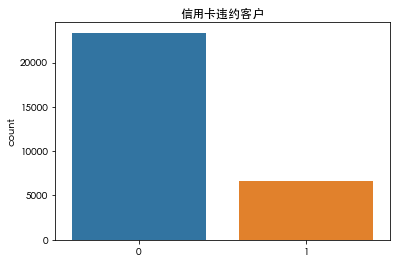

In [20]:
sns.barplot(x=default.index,y=default['count'])
plt.title('信用卡违约客户')
plt.rcParams['font.sans-serif']=['Heiti TC']# 显示中文字体

### 变量的相关性分析

In [22]:
data.corr()['default.payment.next.month'].sort_values()

LIMIT_BAL                    -0.153520
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT4                     -0.056827
PAY_AMT3                     -0.056250
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
SEX                          -0.039961
MARRIAGE                     -0.024339
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
ID                           -0.013952
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
AGE                           0.013890
EDUCATION                     0.028006
PAY_6                         0.186866
PAY_5                         0.204149
PAY_4                         0.216614
PAY_3                         0.235253
PAY_2                         0.263551
PAY_0                         0.324794
default.payment.next.month    1.000000
Name: default.payment.nex

违约情况可透支额度呈现负相关，与2005年九月客户还款情况呈正相关
## 特征选取

In [34]:
# 结合实际请款，海宽与id无关
data.drop(['ID'],inplace=True,axis=1)

In [56]:
# 区分特征向量
target=data['default.payment.next.month'].values

In [57]:
col=list(data.columns)
col.remove('default.payment.next.month')
features=data[col].values

## 模型的训练

In [59]:
from sklearn.model_selection import learning_curve,train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [60]:
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.3,random_state=1)

In [61]:
# 构建分类器
clfs=[
    SVC(random_state=1,kernel='rbf'),
    DecisionTreeClassifier(random_state=1,criterion='gini'),
    RandomForestClassifier(random_state=1,criterion='gini'),
    KNeighborsClassifier(metric='minkowski')
]

In [71]:
clfs_name=[
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [72]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response

In [73]:
for model, model_name, model_param_grid in zip(clfs, clfs_name, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8183
准确率 0.8160
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8191
准确率 0.8186
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.8014
准确率 0.8000
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8036
准确率 0.8064


发现准确率最高的为决策树模型准确率为0.8191